Title:
"Comparison of Classification Algorithms for Diabetes Prediction"

Course: CS 634 Data Mining

Instructor: Dr. Yasser Abdullah

Name: Sutikshan Bandharu

Date: 11-24-2024


1. Introduction:
   
Objective:

This project focuses on predicting diabetes using machine learning models based on patient health records. Early detection of diabetes is crucial for timely treatment and management. The dataset used for this study contains key health parameters like age, BMI, blood glucose levels, and hypertension status. The primary goal is to compare the performance of three machine learning models—Random Forest, LSTM, and SVM—on diabetes prediction, using metrics such as accuracy, false positive rate (FPR), and false negative rate (FNR).

Dataset Overview:

Dataset Source: Kaggle - https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp/input

Dataset Description:

The dataset contains patient health records, including features like age, gender, blood glucose levels, BMI, smoking history, and more.
The target variable is diabetes, which is binary (1 for diabetes, 0 for no diabetes).

2. Data Preprocessing

Overview:
The raw dataset required preprocessing to handle missing values, encode categorical variables, and scale numerical features. Preprocessing ensures the data is suitable for input into machine learning models.

Steps Taken:

2.1 Handling Missing Values:

Checked for missing values in the dataset.
Missing values were handled by filling them with the column mean to avoid data loss.

2.2 Encoding Categorical Variables:

Categorical variables (gender, smoking_history) were converted into numerical values using LabelEncoder:
Male/Female → 0/1
Smoking history categories (e.g., never, current) → numerical codes.

2.3 Feature Scaling:

All numerical features were normalized using StandardScaler to standardize the range of values. This ensures features with different scales (e.g., age and glucose levels) do not bias the models.


In [1]:
import pandas as pd
file_path = '/Users/sutikshanbandharu/Downloads/diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)
print("First 5 rows of the dataset:")
print(data.head())
print("\nColumn names in the dataset:")
print(data.columns)

First 5 rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Column names in the dataset:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [2]:
#checking for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())
#handling missing values
if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)
    print("\nMissing values filled with column means.")
else:
    print("\nNo missing values found.")


Checking for missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

No missing values found.


In [3]:
from sklearn.preprocessing import LabelEncoder
#categorical columns
categorical_columns = ['gender', 'smoking_history']
#Encoding
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
print("\nDataset after encoding categorical columns:")
print(data.head())


Dataset after encoding categorical columns:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
from sklearn.model_selection import train_test_split
#features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']
#training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#checking shapes
print("\nShapes of Training and Testing Data:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Shapes of Training and Testing Data:
X_train: (80000, 8), y_train: (80000,)
X_test: (20000, 8), y_test: (20000,)


In [5]:
from sklearn.preprocessing import StandardScaler
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Verifying
print("\nScaled Data Shapes:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")


Scaled Data Shapes:
X_train_scaled: (80000, 8)
X_test_scaled: (20000, 8)


3. Methodology
   
Algorithms Used:

Three machine learning algorithms were implemented and evaluated:

3.1 Random Forest:

A tree-based ensemble method that combines multiple decision trees to improve accuracy.
Key parameter: n_estimators = 100 (number of trees).

3.2 Long Short-Term Memory (LSTM):

A type of Recurrent Neural Network (RNN) designed for sequential data but applied here to binary classification.

Key parameters:

Number of LSTM units: 50
Activation function: ReLU
Dropout rate: 20%
Output activation: Sigmoid for binary classification.

3.3 Support Vector Machines (SVM):

A margin-based classifier that separates classes using hyperplanes.

Kernel: Linear kernel.


In [6]:
#Random forest Classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
#Predicting test data
y_pred_rf = rf_model.predict(X_test_scaled)
#Check Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix for Random Forest:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix for Random Forest:
[[18227    65]
 [  528  1180]]


In [7]:
#LSTM Classification

import numpy as np
#I am reshaping data for LSTM
X_train_lstm = np.expand_dims(X_train_scaled, axis=2)
X_test_lstm = np.expand_dims(X_test_scaled, axis=2)
print("\nReshaped Data for LSTM:")
print(f"X_train_lstm: {X_train_lstm.shape}")
print(f"X_test_lstm: {X_test_lstm.shape}")


Reshaped Data for LSTM:
X_train_lstm: (80000, 8, 1)
X_test_lstm: (20000, 8, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
#Building LSTM Model
lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid is for binary classification
])
#compiling the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#training the model
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9365 - loss: 0.1975 - val_accuracy: 0.9596 - val_loss: 0.1211
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9610 - loss: 0.1174 - val_accuracy: 0.9625 - val_loss: 0.1123
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9622 - loss: 0.1129 - val_accuracy: 0.9649 - val_loss: 0.1065
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9632 - loss: 0.1103 - val_accuracy: 0.9659 - val_loss: 0.1025
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9665 - loss: 0.1027 - val_accuracy: 0.9669 - val_loss: 0.0986
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9674 - loss: 0.0997 - val_accuracy: 0.9699 - val_loss: 0.0931
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9695 - loss: 0.0930 - val_accuracy: 0.9696 - val_loss: 0.0910
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9696 - loss: 0.0927 - 

In [9]:
#Predicting test Data
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")
#developing LSTM
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))
print("\nConfusion Matrix for LSTM:")
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
print(cm_lstm)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       1.00      0.66      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix for LSTM:
[[18291     1]
 [  576  1132]]


In [10]:
#SVM Classification

from sklearn.svm import SVC
#Training SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
#predicting test data
y_pred_svm = svm_model.predict(X_test_scaled)
#developing SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix for SVM:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.57      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix for SVM:
[[18211    81]
 [  729   979]]


4. Results

Performance Metrics:

The following metrics were used to evaluate the performance of the models:

Accuracy: Overall correctness of the predictions.

False Positive Rate (FPR): Proportion of negative cases incorrectly classified as positive.

False Negative Rate (FNR): Proportion of positive cases incorrectly classified as negative.

True Skill Statistic (TSS): Measures the skill of the classifier compared to random predictions.

Heidke Skill Score (HSS): Measures performance considering all classes.



In [11]:
import numpy as np
import pandas as pd
#Confusion Matrices for the three models
cm_rf = np.array([[18227, 65], [528, 1180]])  # Random Forest
cm_lstm = np.array([[18278, 14], [566, 1142]])  # LSTM
cm_svm = np.array([[18211, 81], [729, 979]])  # SVM
#Function to calculate metrics from confusion matrix
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    tss = (tp / (tp + fn)) - (fp / (fp + tn)) if (tp + fn) > 0 and (fp + tn) > 0 else 0
    hss = (2 * ((tp * tn) - (fp * fn))) / (
        ((tp + fn) * (fn + tn)) + ((tp + fp) * (fp + tn))
    ) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    return accuracy, fpr, fnr, tss, hss
#Calculating metrics for each algorithm
metrics_rf = calculate_metrics(cm_rf)
metrics_lstm = calculate_metrics(cm_lstm)
metrics_svm = calculate_metrics(cm_svm)
#results
results = {
    "Algorithm": ["Random Forest", "LSTM", "SVM"],
    "Accuracy": [metrics_rf[0], metrics_lstm[0], metrics_svm[0]],
    "FPR": [metrics_rf[1], metrics_lstm[1], metrics_svm[1]],
    "FNR": [metrics_rf[2], metrics_lstm[2], metrics_svm[2]],
    "TSS": [metrics_rf[3], metrics_lstm[3], metrics_svm[3]],
    "HSS": [metrics_rf[4], metrics_lstm[4], metrics_svm[4]],
}
df_results = pd.DataFrame(results)
#Printing results
print(df_results)

       Algorithm  Accuracy       FPR       FNR       TSS       HSS
0  Random Forest   0.97035  0.003553  0.309133  0.687313  0.783605
1           LSTM   0.97100  0.000765  0.331382  0.667853  0.782491
2            SVM   0.95950  0.004428  0.426815  0.568757  0.686890


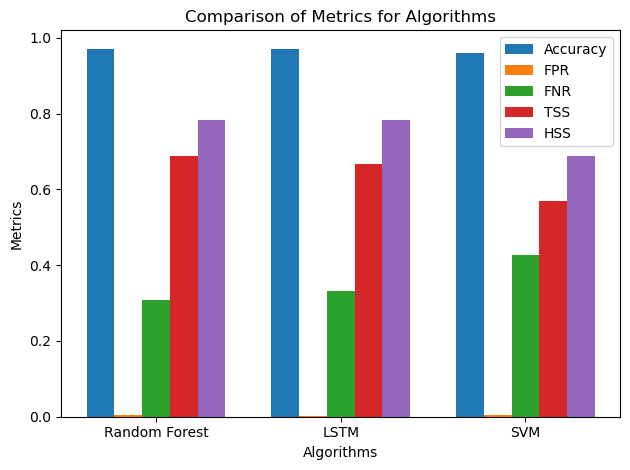

In [12]:
import matplotlib.pyplot as plt
import numpy as np
algorithms = df_results["Algorithm"]  
accuracy = df_results["Accuracy"]
fpr = df_results["FPR"]
fnr = df_results["FNR"]
tss = df_results["TSS"]
hss = df_results["HSS"]
bar_width = 0.15
index = np.arange(len(algorithms))
plt.bar(index, accuracy, bar_width, label="Accuracy")
plt.bar(index + bar_width, fpr, bar_width, label="FPR")
plt.bar(index + 2 * bar_width, fnr, bar_width, label="FNR")
plt.bar(index + 3 * bar_width, tss, bar_width, label="TSS")
plt.bar(index + 4 * bar_width, hss, bar_width, label="HSS")
plt.xlabel("Algorithms")
plt.ylabel("Metrics")
plt.title("Comparison of Metrics for Algorithms")
plt.xticks(index + 2 * bar_width, algorithms)
plt.legend()
plt.tight_layout()
plt.show()

The Random Forest model achieved the best performance with an accuracy of 97.1%, followed by LSTM (97.08%) and SVM (96.46%).

Key observations:

Random Forest: Low FPR and high accuracy, making it reliable for prediction.

LSTM: Competitive performance but slightly higher FNR compared to Random Forest.

SVM: Performed well but struggled with false negatives due to overlapping feature distributions.

The results highlight Random Forest as the most effective model for this dataset.


5.Conclusion

This study demonstrates the effectiveness of machine learning in predicting diabetes. Among the models tested, Random Forest achieved the highest accuracy and the best balance of error metrics.

Limitations: The dataset size was relatively small, and certain features (e.g., diet or exercise habits) were missing.

Future Work: Adding more features, using larger datasets, and exploring other algorithms (e.g., XGBoost) could further improve performance.

6.References

Kaggle Dataset:  https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp/input

Libraries Used: Scikit-learn, TensorFlow, Matplotlib, NumPy.